# Linear Regression
\begin{equation}
 y= a + b x
\end{equation}

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from IPython.display import Image 

In [17]:
#from sklearn.linear_model import LinearRegression
#LinearRegression.fit()
#LinearRegression.predict(x_test)

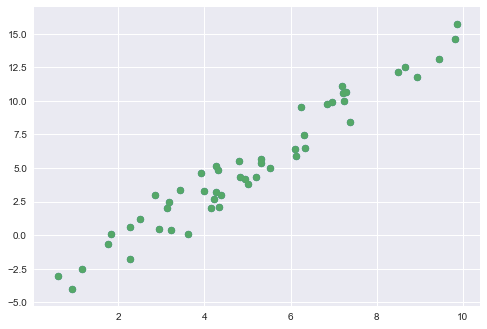

In [18]:
# data creation

rng = np.random.RandomState(123)
X = 10 * rng.rand(50)
y = -5 + 2 * X + rng.randn(50)
#y=15+2X+e

plt.scatter(X, y)
plt.show()

In [19]:
X.shape

(50,)

In [20]:
X[:,None].shape

(50, 1)

In [21]:
# Fitting with linear regression 

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X[:, None], y) #"fit" important!!!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# test data
x_test = np.linspace(0, 10, 1000)[:, None]
y_hat = model.predict(x_test)

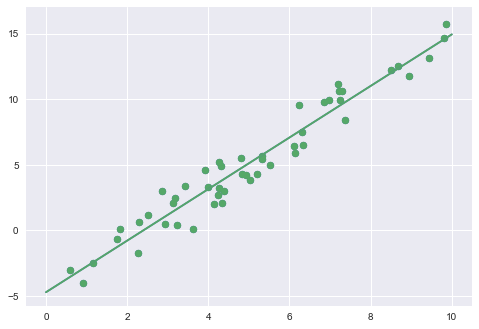

In [25]:
# plotting
plt.scatter(X, y)
plt.plot(x_test, y_hat)
plt.show()

In [24]:
# estimated coefficient

print(model.coef_, model.intercept_)

[ 1.96684644] -4.728336423


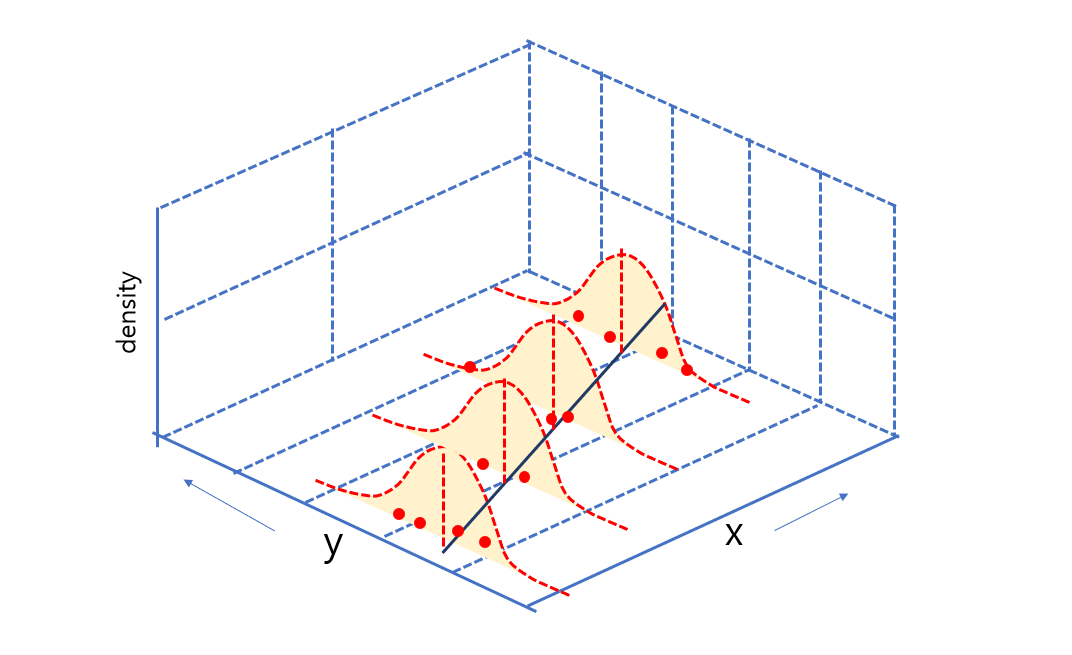

In [6]:
Image("c:/python/images/3D_Linear_Regression.PNG", width=566, height=1600)

# Polynomial function regression

\begin{equation}
    y = a_o + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
\end{equation}

In [25]:
# what is PBF?
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2,3,4])[:, None]
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x)

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

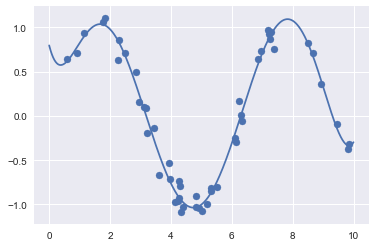

In [29]:
# pipe lining with features

rng = np.random.RandomState(123)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
x_test = np.linspace(0, 10, 1000)[:, None]

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

poly_model.fit(x[:, None], y)
y_hat = poly_model.predict(x_test)

plt.scatter(x, y)
plt.plot(x_test, y_hat)

# Example: Predictiong Bicycle Traffic
```Number of bicycle traffics in an area based on weather, season, and other factors```


### Exercise
* import data with the following command:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [1]:
# data loading
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 97424    0 97424    0     0  35830      0 --:--:--  0:00:02 --:--:-- 35830
100  511k    0  511k    0     0   135k      0 --:--:--  0:00:03 --:--:--  135k
100 1198k    0 1198k    0     0   246k      0 --:--:--  0:00:04 --:--:--  246k
100 1556k    0 1556k    0     0   304k      0 --:--:--  0:00:05 --:--:--  353k


In [2]:
import pandas as pd
counts = pd.read_csv('c:/python/data/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('c:/python/data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [3]:
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [4]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [5]:
# resampleing: from minutes to daily 

daily = counts.resample('d').sum()
daily['Total']=daily.sum(axis=1)
daily = daily[['Total']]    # double square bracket for dataframe

In [24]:
# weekday aggregation

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [25]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-10-08,3537.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-09,3501.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-10,3235.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-11,3047.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
# holiday

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

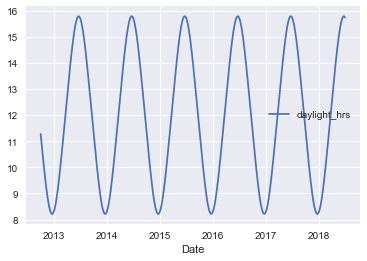

In [27]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
# plt.ylim(8, 17)

In [28]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [29]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [30]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


In [32]:
# In sample prediction 

daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

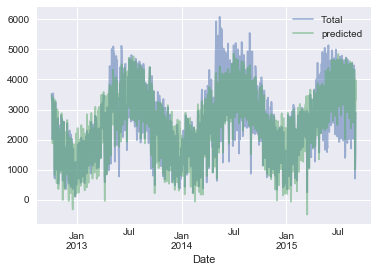

In [33]:
daily[['Total', 'predicted']].plot(alpha=0.5)

In [34]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

In [35]:
# to check significance: using bootstrapping

from sklearn.utils import resample
np.random.seed(123)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)],0)

In [36]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [37]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0


## OLS with Dow

In [41]:
path = "c:/python/data/"
data = pd.read_csv(path+'dow/data.csv')
data.index = pd.to_datetime(data['Date'])
data = data.dropna()

In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
symbol = 'V'
x = ((data[symbol]).pct_change().dropna())*250
X = x[:, None]
y = ((data["^DJI"]).pct_change().dropna())*250
y = y[:, None]

In [45]:
lr = LinearRegression(fit_intercept=True).fit(X, y)
yhat = lr.predict(X)

Text(0.5,1,'Linear Regression Visa and Dow')

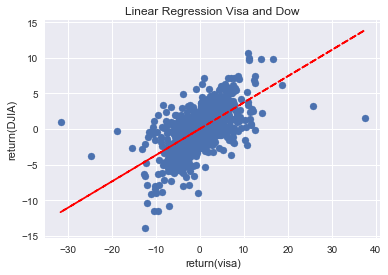

In [46]:
plt.scatter(x, y)
plt.plot(x, yhat, 'r--')
plt.xlabel("return(visa)")
plt.ylabel("return(DJIA)")
plt.title("Linear Regression Visa and Dow")

In [47]:
print(lr.coef_, lr.intercept_)

[[0.36938095]] [0.0207874]


In [ ]:
## you may get the sample result, however, and statistical significance with
## statmodels OLS
# from statmodels.formula.api import ols 
# result = OLS('V~^DJI', data= data')
# print(result.summary())

### see timeseries/OLS